## Load the Quickdraw model

In [18]:
%matplotlib inline
from keras.models import load_model
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from PIL import Image
import io
import uuid
import numpy as np

import matplotlib.image as mpimg
from keras.applications.xception import (
    Xception, preprocess_input, decode_predictions)

import base64
import requests
from io import BytesIO


In [3]:
model = load_model("Quickdraw.h5")

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


# Import a Custom Image

In [35]:
manuallysaved = './lib/inputimages/98183563.png'
image_size =(28,28)
im = image.load_img(manuallysaved, target_size=image_size,  grayscale=True)  #  from keras.preprocessing import image
originalsize = image.load_img(manuallysaved, grayscale=True)
im

In [69]:
filepath = "https://doodlepredictionimages.s3-us-west-1.amazonaws.com/37CDB390.png"

if filepath.startswith('https://'):
        response = requests.get(filepath)
        s3image = Image.open(BytesIO(response.content)).convert('L')
        im = s3image.resize((28, 28))

In [70]:
origarr = img_to_array(originalsize)
origarr.shape

(269, 280, 1)

In [71]:
imgarr = img_to_array(im)
imgarr.shape

(28, 28, 1)

In [72]:
# Flatten into a 1x28*28 array 
imgarr /= 255

# Flatten into a 1x28*28 array 
img = imgarr.flatten().reshape(-1,28,28,1)

img = 1 - img

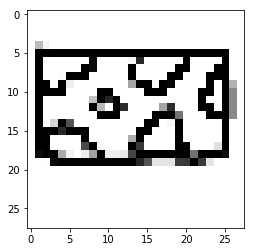

In [73]:
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [74]:
predictedclass = model.predict_classes(img)
predictedclass

array([5], dtype=int64)

./static/qdimages/5.png


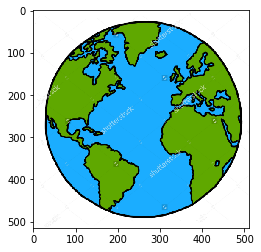

In [75]:
imgname = f"./static/qdimages/{predictedclass[0]}.png"
print(imgname)

img=mpimg.imread(imgname)
imgplot = plt.imshow(img)
plt.show()